## In this notebook I will attempt to reproduce figures from various articles I have read on Network Science in researching my mini-project.

#### Bistability through Triadic Closure

###### Figure 1.

This figure is a graph of the edge density for four different simulations of an evolving-network model. The model is based on triadic closure, with edge-independent birth and death probabilities. It is a Markov model, given by $\langle{A_{k+1}|A_k}\rangle = (\mathbb{1}-\omega(A_k)) \circ A_k + \alpha(A_k) \circ (\mathbb{1}-A_k)$. In our specific case, $\alpha(A_k)=\delta\mathbb{1} + \epsilon\mathbb{1}\circ A_k^2$ and $\omega(A_k)=\tilde{\omega}A_k$.

100%|█████████████████████████████████████████████| 4/4 [01:56<00:00, 29.12s/it]


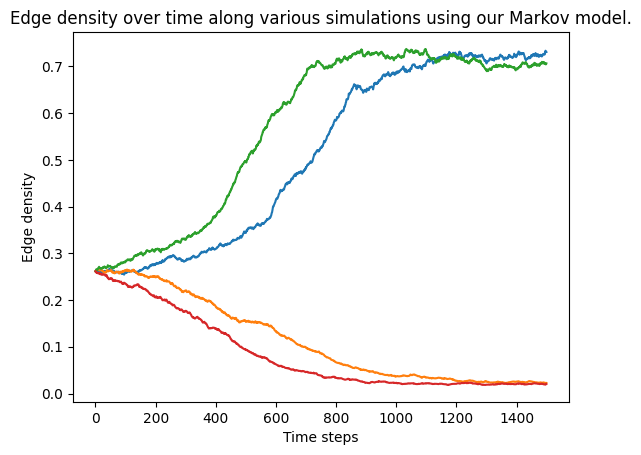

In [7]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

#Identity matrix
def eye(n):
    return np.ones((n,n)) - np.eye(n)

#Alpha function in model specification
def alpha(mat, d, e):
    n=mat.shape[0]
    I=eye(n)
    return d * I + np.multiply(e * I, np.matmul(mat, mat))

#Omega function in model specification
def omega(mat, w):
    n=mat.shape[0]
    I=eye(n)
    return w * I

#Expected successive matrix
def expected_next(mat, d, e, w):
    n=mat.shape[0]
    I=eye(n)
    
    survived=(I - omega(mat, w)) * mat
    born=alpha(mat, d, e) * (I - mat)
    
    return survived + born

#Random successive matrix from model
def time_step(mat, d, e, w):
    expected=expected_next(mat, d, e, w)
    time_step=np.empty(mat.shape)
    
    for i in range(len(mat[0])):
        for j in range(i+1, len(mat)):
            rnd=np.random.uniform()
            if rnd <= expected[i][j]:
                time_step[i][j] = 1
            else:
                time_step[i][j] = 0
            time_step[j][i] = time_step[i][j]
        
    return time_step

#Store simulations
def simulations(mat, d, e, w, N):
    matrices=[]
    for i in range(N):
        matrices.append(mat)
        mat=time_step(mat, d, e, w)
        
    return matrices

#Store edge-densities along a simulation
def densities_of_network(mat, d, e, w, N):
    densities=[]
    matrices=simulations(mat, d, e, w, N)
    n=mat.shape[0]
    
    for matrix in matrices:
        count=0
        for i in range(n):
            for j in range(i+1, n):
                count+=matrix[i][j]
        density=(2 / (n * (n - 1))) * count
        densities.append(density)
        
    return densities

fig=plt.figure()
ax=fig.subplots()
ax.set_title("Edge density over time along various simulations using our Markov model.")
ax.set_ylabel("Edge density")
ax.set_xlabel("Time steps")

init=nx.to_numpy_array(nx.erdos_renyi_graph(100,0.265))
for i in tqdm(range(4)):
    time=list(range(1500))
    densities=densities_of_network(init,0.0002,0.0005,0.01,1500)
    ax.plot(time, densities)

Nice!